# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
def to_celcius(temp):
    return round(((temp-32)/1.8),4)

# Reading the clean data to a Pandas Dataframe

In [3]:
# read in the csv data into a pandas data frame and set the date as the index
df = pd.read_csv('WeatherFinalCleanData.csv').set_index('date')

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatureMin,1823.0,66.403538,4.665739,47.8600,63.6900,67.1300,69.0650,77.3700
temperatureMax,1823.0,85.500570,4.386851,71.8500,82.3150,84.9900,88.6100,97.7900
temperatureMean,1823.0,72.776760,2.246779,70.5929,70.5929,70.5929,75.0625,75.2133
temperatureMin_1,1823.0,66.404646,4.664938,47.8600,63.7050,67.1300,69.0650,77.3700
temperatureMin_2,1823.0,66.403796,4.665880,47.8600,63.7050,67.1300,69.0650,77.3700
temperatureMin_3,1823.0,66.402024,4.668162,47.8600,63.7050,67.1300,69.0650,77.3700
temperatureMax_1,1823.0,85.501108,4.386200,71.8500,82.3150,84.9900,88.6100,97.7900
temperatureMax_2,1823.0,85.502995,4.384438,71.8500,82.3200,84.9900,88.6100,97.7900
temperatureMax_3,1823.0,85.504849,4.382693,71.8500,82.3200,84.9900,88.6100,97.7900
humidity_1,1823.0,0.678097,0.128172,0.2400,0.6000,0.7200,0.7700,0.9700


In [4]:
#Checking the structure of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1823 entries, 2018/01/04 to 2022/12/31
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatureMin     1823 non-null   float64
 1   temperatureMax     1823 non-null   float64
 2   temperatureMean    1823 non-null   float64
 3   temperatureMin_1   1823 non-null   float64
 4   temperatureMin_2   1823 non-null   float64
 5   temperatureMin_3   1823 non-null   float64
 6   temperatureMax_1   1823 non-null   float64
 7   temperatureMax_2   1823 non-null   float64
 8   temperatureMax_3   1823 non-null   float64
 9   humidity_1         1823 non-null   float64
 10  humidity_2         1823 non-null   float64
 11  humidity_3         1823 non-null   float64
 12  dewPoint_1         1823 non-null   float64
 13  dewPoint_2         1823 non-null   float64
 14  dewPoint_3         1823 non-null   float64
 15  windSpeed_1        1823 non-null   float64
 16  windSpeed_2   

# Dropping features that are not useful for prediction

In [5]:
#remove the min and max temp columns as they have no meaning in helping us predict the average mean temperatures for the future
# First drop the max temp and min temp from the dataframe
df = df.drop(['temperatureMin', 'temperatureMax'], axis=1)

# X will be a pandas dataframe of all columns except temperatureMean
X = df[[col for col in df.columns if col != 'temperatureMean']]

# y will be a pandas series of the temperatureMean 
y = df['temperatureMean']

# Splitting the data for training and testing 

In [6]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [7]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   1458, Training features   18
Validation instances 183, Validation features 18
Testing instances    182, Testing features    18


# Getting FeatureColumn instance for numeric, continuous-valued features

In [8]:
#Defining a list of numeric feature columns using the tf.feature_column.numeric_column() function which returns a FeatureColumn instance for numeric, continuous-valued features.
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [9]:
#check tensorflow version, if no updated do conda update -f -c conda-forge tensorflow
print(tf.__version__)

2.2.0


In [10]:
X_test.head(10)

,temperatureMin_1,temperatureMin_2,temperatureMin_3,temperatureMax_1,temperatureMax_2,temperatureMax_3,humidity_1,humidity_2,humidity_3,dewPoint_1,dewPoint_2,dewPoint_3,windSpeed_1,windSpeed_2,windSpeed_3,temperatureMean_1,temperatureMean_2,temperatureMean_3
date,,,,,,,,,,,,,,,,,,
2021/01/25,63.50,63.39,63.28,81.23,81.11,81.00,0.59,0.59,0.59,55.33,55.42,55.51,4.96,4.95,4.94,75.0625,75.0625,75.0625
2020/06/02,71.36,71.49,71.62,88.99,89.12,89.25,0.69,0.69,0.69,67.55,67.51,67.48,8.40,8.31,8.22,70.5929,70.5929,70.5929
2022/08/02,67.12,67.12,67.12,84.80,84.79,84.79,0.78,0.78,0.78,66.84,66.83,66.83,10.08,10.14,10.19,75.0625,75.0625,75.0625
2019/09/06,66.37,66.58,67.88,81.08,80.69,79.88,0.80,0.80,0.80,66.87,66.43,66.36,17.66,16.25,17.38,70.5929,70.5929,70.5929
2021/06/17,69.56,69.67,69.79,87.19,87.30,87.42,0.74,0.74,0.74,67.69,67.69,67.70,9.65,9.57,9.50,75.0625,75.0625,75.0625
2021/05/21,72.91,73.03,73.15,90.54,90.66,90.78,0.64,0.64,0.64,66.86,66.77,66.68,7.28,7.19,7.10,75.0625,75.0625,75.0625
2018/12/10,58.88,60.98,62.64,82.70,81.59,82.07,0.73,0.78,0.77,60.18,63.08,62.98,6.89,7.67,7.47,70.5929,70.5929,70.5929
2021/04/14,75.14,75.11,75.08,92.82,92.80,92.77,0.49,0.49,0.48,61.18,60.98,60.77,5.09,5.07,5.05,75.0625,75.0625,75.0625
2020/12/14,62.48,62.53,62.59,80.13,80.18,80.24,0.72,0.72,0.72,59.89,60.00,60.11,4.80,4.81,4.81,75.0625,75.0625,75.0625


# Creating the Neural Network

In [11]:
#instantiating the tf.estimator.DNNRegressor(...) class
#Creating a neural network that has two layers deep where both layers have a width of 50 nodes.
regressor = tf.estimator.DNNRegressor(
    feature_columns=feature_cols, hidden_units=[50, 50], model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [12]:
#defining a reusable function that is an "input function" called wx_input_fn(...)
#The function will be used to feed data into neural network during the training and testing phases.
#based off the tf.compat.v1.estimator.inputs.pandas_input_fn(...) since the data is in a pandas data structures.

def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=729): #729 because we have 1458 dataset for training
    return tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=X, y=y, num_epochs=num_epochs, shuffle=shuffle, batch_size=batch_size)

# Training the model

In [13]:
#defining a simple training loop to train the model on the training data and evaluate it periodically on the evaluation data
evaluations = []
STEPS = 729
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val, y_val, num_epochs=1, shuffle=False)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argumen

In [14]:
evaluations[0]

{'average_loss': 3.8479607,
 'label/mean': 72.63413,
 'loss': 3.8479607,
 'prediction/mean': 72.36915,
 'global_step': 729}

# Plotting graph for the training steps

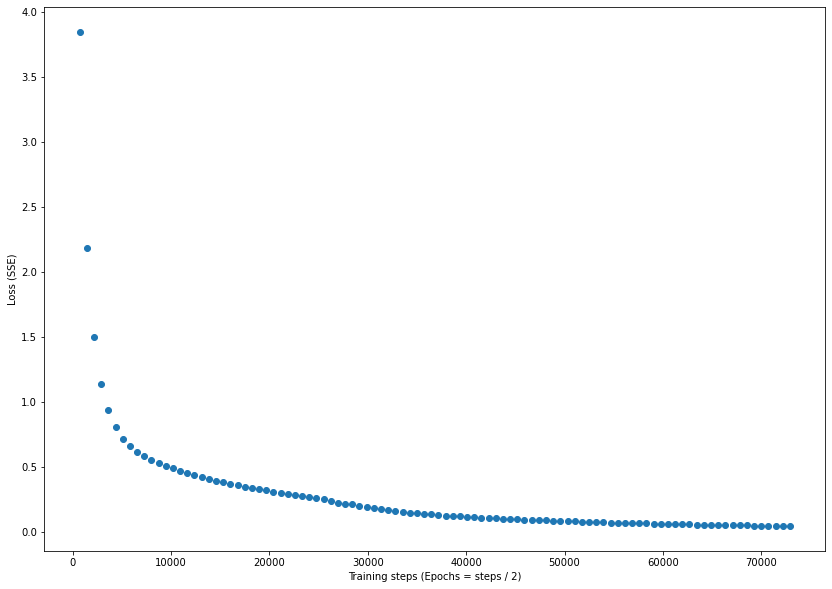

In [15]:
#or each of the iterations plot function of training steps to ensure we have not over-trained our model
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

# Note : The mean absolute error for CNN Model is 0.10

In [16]:
# Using array of predictions with the sklearn methods explained_variance_score(...), mean_absolute_error(...), and median_absolute_error(...) 
# this measures how well the predictions fared in relation to the known targets y_test
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-72900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.99
The Mean Absolute Error: 0.10 degrees Celcius
The Median Absolute Error: 0.03 degrees Celcius


# Evaluating using test data

In [17]:
#Checking the Predictions on the test data
predictions = list(map(to_celcius,predictions))
tmp = pd.read_csv("TestData.csv")
test_data = tmp["temperatureMean_3"]
test_data = list(map(to_celcius,test_data))

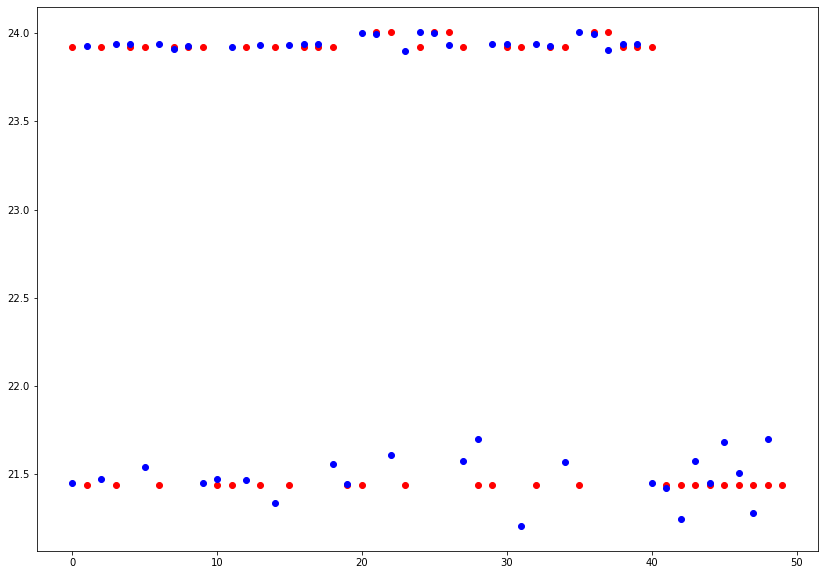

In [18]:
plt.plot(test_data[:50],'ro', predictions[1:50], 'bo')
plt.show()

# Making Predictions

In [22]:
pred_data = pd.read_csv('PredictData.csv').set_index('date')
pred = regressor.predict(input_fn=wx_input_fn(pred_data,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-72900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [24]:
predictions = list(map(to_celcius,predictions))
predictions

[23.9283]